In [1]:
import os
os.chdir("D:\SEM - 6\Machine Learning\Viswanathan")

In [2]:
"""
Author: Thirunavukkarasu J
Reg no: 19BDS0146
Vellore University of Technology, Vellore
Course Title: Machine Learning
"""

'\nAuthor: Thirunavukkarasu J\nReg no: 19BDS0146\nVellore University of Technology, Vellore\nCourse Title: Machine Learning\n'

#### Importing the required libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp  
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

#### Loading the file 

In [15]:
df = pd.read_csv("ndata.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Dropping columns – ‘id’ and ‘Unnamed: 32’ as they have no role in prediction

In [16]:
df = df.drop(["Unnamed: 32","id"], axis=1)

#### Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0

In [17]:
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


#### Finding the null values in the dataset

In [19]:
df.isnull().sum().sum()

0

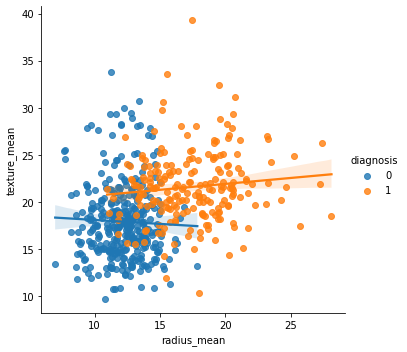

In [20]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

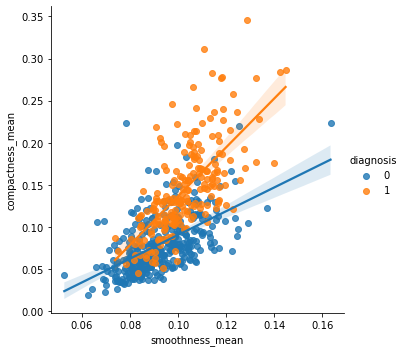

In [21]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
		data = df, hue = 'diagnosis')

#### Splitting data to Input and Output data

In [22]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

#### Splitting data to training and testing

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### Model fitting Using Sklearn

In [33]:
# Importing the model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
# Initiating the model:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy' ,cv=10).mean()
print("The mean accuracy with 10 fold cross validation is %s" % round(scores*100,2))

The mean accuracy with 10 fold cross validation is 95.26


Lets try to fine tune the parameters and see if we can get any improvisation.
The default number of trees is 10. However, lets try running Random Forest for different values of trees:

In [40]:
for i in range(1, 21):
    rf = RandomForestClassifier(n_estimators = i)
    score = cross_val_score(rf, X_train, y_train, scoring='accuracy',cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score,2)))

N = 1 :: Score = 0.87
N = 2 :: Score = 0.93
N = 3 :: Score = 0.95
N = 4 :: Score = 0.94
N = 5 :: Score = 0.94
N = 6 :: Score = 0.94
N = 7 :: Score = 0.94
N = 8 :: Score = 0.94
N = 9 :: Score = 0.95
N = 10 :: Score = 0.95
N = 11 :: Score = 0.94
N = 12 :: Score = 0.95
N = 13 :: Score = 0.95
N = 14 :: Score = 0.94
N = 15 :: Score = 0.95
N = 16 :: Score = 0.96
N = 17 :: Score = 0.96
N = 18 :: Score = 0.96
N = 19 :: Score = 0.96
N = 20 :: Score = 0.94


It looks like trees with 18 should give a reasonable estimate of the test data. Let us trying using Random Forest and Naive Bayes on our test dataset and finalize our model.

#### Prediction

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Initiating the model:
rf = RandomForestClassifier(n_estimators=18)
rf = rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
acc_test = metrics.accuracy_score(y_test, predicted)
print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.96


#### Conclusion

The implementation was investigated on different distance measures and classification rules and the metrics are recorded. Evidently, the best results were obtained as 96% employing Euclidean distance. For larger datasets, the running time of the  Random Forest can be high. Prediction of malignant tumour in the very early stages can be done directly on the mammography images with high degree of accuracy using deep learning techniques.